<a href="https://colab.research.google.com/github/chandan5362/Machine-Learning/blob/main/multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
x = np.asarray([-2,-4,-6,-6,4])
x-=x.max()
x

array([ -6,  -8, -10, -10,   0])

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test1.csv to test1.csv
Saving training1.csv to training1.csv


In [ ]:
import io
train_df = pd.read_csv(io.BytesIO(uploaded['training1.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['test1.csv']))

In [ ]:
train_df.shape

(6668, 193)

In [ ]:
test_df.shape

(3331, 193)

## **Softmax**

In [ ]:
def convert_to_one_hot(labels):
    """
    convert the output class to one hot variable
    say, if there are k different classes and m training example,
    then output matrix is of the size (k,m)

    It returns the one hot converted vector 
    """
    class_count = len(set(labels))
    one_hot = np.zeros((len(labels),class_count))
    
    for i in range(len(labels)):
        one_hot[i,labels[i]] = 1
    return one_hot

In [ ]:
def random_shuffle(train,test,flag):
    """
    shuffle the train set so as to train the model better.
    """
    np.random.seed(4)
    rand = np.random.permutation(train.shape[0])
    x_train = train.iloc[:,:192].values[rand]
    y_train = train.iloc[:,192].values[rand]
    x_test = test.iloc[:,:192].values
    y_test = test.iloc[:,192].values
    if flag == 0:
      x_train = np.insert(x_train,0,1,axis = 1)
      x_test = np.insert(x_test,0,1,axis = 1)

    return [x_train,y_train,x_test,y_test]

In [ ]:
#initialize the weight parameters
def initialize_weight(train,classes,num_of_feature):
    """
    initializes the weight for softmax model
    """
    np.random.seed(0)
    weight = np.random.randn(classes,num_of_feature)*0.01
    return weight

In [ ]:
def find_z(weight,x):
    """
    return the dot product of weight with input variable
    """
    return np.dot(weight,x)  

In [ ]:
def calculate_softmax(to_b_cal_soft):
    """
    return the softmax of input array
    """
    x_item  = np.exp(to_b_cal_soft)
    return x_item/np.sum(x_item,axis = 0)

In [ ]:
def cross_entropy_gradient(__y,y,x,m):
    """
    return the cross entropy gradient of expected value and predicted value
    """
    return 1/m*(np.dot(__y-y,x))

In [ ]:
def cross_entropy_loss(yhat,y,m):
    """
    calculate the cross entropy loss of predicted value with respect 
    to original value
    """
    loss_total = 0
    for i in range(len(yhat)):
        loss_c = 0
        
        for j in range(y.shape[1]):
            loss_c+=(np.log(yhat[i][j])*y[i][j])
        loss_total+=loss_c
    return -1/m*(loss_total)
            

In [ ]:
def train(weight,X,Y,learning_rate = 0.1, max_iter = 10001, print_true = True):
    """
    train the model with batch gradient descent over m taining example.
    if there are k classes and m training example and n input features
    
    weight  =  matrix of size (k,n)
    X = matrix of size (m,n)
    Y = matrix of size (m,k)
    to_b_cal_soft = matrix of size (k,m)
    soft = softmax version of to_b_cal_soft matrix and of the same shape
    loss = scalar quantity
    output of cross entropy gradient is (k,n) matrix
    
    """
    cost = []
    m = X.shape[0]
    for i in range(max_iter):
        to_b_cal_soft = find_z(weight,X.T)
        
        soft_x = calculate_softmax(to_b_cal_soft)

        loss = cross_entropy_loss(soft_x.T,Y,m)
        if print_true and i%500 == 0:
          cost.append(loss)
          print("Cost after {} steps = {:.5f}".format(i,loss))

        weight = weight - learning_rate*cross_entropy_gradient(soft_x,Y.T,X,m)

    return weight,cost

In [ ]:
def predict_soft(x_test,y_test,weight_calculated):
    """
    returns the final predicted value
    """
    x_out = find_z(weight_calculated,x_test.T)
    soft_test_out = calculate_softmax(x_out)
    max_index_col = np.argmax(soft_test_out,axis = 0)
    return max_index_col

## **Feed Forward Neural Net**

In [ ]:
def initialize_parametrs(train,label):
  """
  if there are m training set and n features,
  hidden unit = h,
  output label = k, then
  W1 = (h,n)
  W2 = (k,h)
  """
  hidden_unit = 250
  np.random.seed(4)
  W1 = np.random.randn(hidden_unit,train.shape[1])*0.01 
  W2 = np.random.randn(label,hidden_unit)*0.01
  b1 = np.zeros((hidden_unit,1))
  b2 = np.zeros((label,1))


  return W1, W2, b1, b2


In [ ]:
def z_out(W,X):
  """
  input parameters
  W = weight matrix of a given layer
  X = input metrix of a given layer

  return the dot product of W and X 
  """
  return np.dot(W,X)

In [ ]:
def sigmoid(X):
  """
  input
  X is input feature
  it returns sigmoid of the given input X
  """
  return 1/(1 + np.exp(-X))

In [ ]:
def forward_propgation(x_train,y_train,w1,w2,b1,b2):
  """
  input -
  x_train = input feature for the first layer
  y_train = class labels for one hot encoed vector of training set
  w1 = weight matrix for hidden layer
  w2 = weight matrix for output layer
  b1 = bias for hidden layer
  b2 = bias for output layer

  output -
  return the actiavted output for each layer 

  """
  
  z1 = z_out(w1,x_train.T) + b1
  a1 = sigmoid(z1)
  
  z2 = z_out(w2,a1)+b2
  a2 = sigmoid(z2)

  return a1,a2

In [ ]:
def squared_loss(a2,y_act):
    """
    calculate the sum of squared loss of predicted value with respect 
    to original value

    a2 = output from second layer
    y_act = actual output value of all the training set

    It returns the total loss for the predicted value  
    """
    loss_total = 0
    m = a2.shape[1] # total number of training examples
    for i in range(a2.shape[1]):
        loss_c = 0
        
        for j in range(a2.shape[0]):

          loss_c+=((a2[j,i]-y_act[j,i])**2)
        loss_total+=loss_c
    return ((1/m)*(loss_total))/2
            

In [ ]:
def backPropagation(a1,a2,w1,w2,X, y_act):
  """
  performs backprop to update the parameters
  input -
  a1,a2 = model output for first layer and second layer respectively.
  w1,w2 = weight parameter for first and second layer respectively.
  X = input features
  y_act = actual output for the given training set

  output -
  returns the gradient vector for each parameter 
  
  """
  m = X.shape[1]
  dz2 = np.multiply((a2-y_act),np.multiply(a2,1-a2))
  dw2 = (1/m) * (np.dot(dz2,a1.T))
  db2 = (1/m) * np.sum(dz2,axis  = 1, keepdims=True)
  da1 = np.dot(w2.T,dz2)
  dz1 = np.multiply(da1,np.multiply(a1,1-a1))
  dw1 = (1/m) * np.dot(dz1,X.T)
  db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)

  return dw1,db1,dw2,db2

In [ ]:
def update_parameter(x_train,y_train,w1,w2,b1,b2,epochs = 10,l_r = 0.1,print_loss = True):
  """
  update the model paramters using backprop.
  """
  cost = []
  for i in range(epochs):
    a1,a2 = forward_propgation(x_train,y_train,w1,w2,b1,b2)
    loss = squared_loss(a2,y_train)

    if print_loss and i%500 == 0:
      cost.append(loss)
      print("Cost after {} steps = {:.5f}".format(i,loss))

    dw1,db1,dw2,db2 = backPropagation(a1,a2,w1,w2,x_train.T,y_train)
    w1 = w1 - l_r*dw1
    b1 = b1 - l_r*db1
    w2 = w2 - l_r*dw2
    b2 = b2 - l_r*db2
  return w1,w2,b1,b2,cost

In [ ]:
def calculate_accuracy(y_act,y_pred):
  """
  calculates acuracy for the give model
  """
  total = len(y_pred)
  tp = 0
  for i in range(total):
    if y_act[i] == y_pred[i]:
      tp+=1
  return tp,total


In [ ]:
def predict(x_test, y_test,w1,b1,w2,b2):
  """
  predicts the output for the test set.
  """
  a1,a2 = forward_propgation(x_test,y_test,w1,w2,b1,b2)
  y_pred = np.argmax(a2,axis = 0)
  return y_pred


# FFNN


In [ ]:
def neural_net(train_df,test_df):

  x_train,y_train,x_test,y_test = random_shuffle(train_df,test_df,1)
  
  w1, w2, b1, b2 = initialize_parametrs(x_train,len(set(y_train)))
  y_train = convert_to_one_hot(y_train)
  y_train = y_train.T
  w1,w2,b1,b2, cost = update_parameter(x_train,y_train,w1,w2,b1,b2,epochs = 10001,l_r = 0.1)
  
  y_pred_test = predict(x_test,y_test,w1,b1,w2,b2)
  tp,total = calculate_accuracy(y_test,y_pred_test)

  print("accuracy is {:.2f}%".format((tp/total)*100))
  return cost,tp


In [ ]:
cost_ffnn,tp_ffnn = neural_net(train_df,test_df)

Cost after 0 steps = 1.24423
Cost after 500 steps = 0.42558
Cost after 1000 steps = 0.28250
Cost after 1500 steps = 0.18313
Cost after 2000 steps = 0.13920
Cost after 2500 steps = 0.11649
Cost after 3000 steps = 0.10254
Cost after 3500 steps = 0.09295
Cost after 4000 steps = 0.08591
Cost after 4500 steps = 0.08048
Cost after 5000 steps = 0.07612
Cost after 5500 steps = 0.07252
Cost after 6000 steps = 0.06946
Cost after 6500 steps = 0.06681
Cost after 7000 steps = 0.06447
Cost after 7500 steps = 0.06237
Cost after 8000 steps = 0.06046
Cost after 8500 steps = 0.05872
Cost after 9000 steps = 0.05711
Cost after 9500 steps = 0.05562
Cost after 10000 steps = 0.05422
accuracy is 92.92%


In [ ]:
tp_ffnn

3095

# SOFTMAX

In [ ]:
def softmax(train_df, test_df):

  x_train,y_train,x_test,y_test = random_shuffle(train_df,test_df,0)
  y_train = convert_to_one_hot(y_train)
  classes = y_train.shape[1]
  feature = x_train.shape[1]
  weight = initialize_weight(x_train,classes,feature)
  weight_calculated,cost= train(weight,x_train,y_train)
  yhat =predict_soft(x_test,y_test,weight_calculated)
  tp,total = calculate_accuracy(y_test,yhat)

  print("accuracy is {:.2f}%".format((tp/total)*100))
  return cost,tp


In [ ]:
cost_soft, tp_soft = softmax(train_df,test_df)

Cost after 0 steps = 2.34473
Cost after 500 steps = 0.25042
Cost after 1000 steps = 0.22251
Cost after 1500 steps = 0.20879
Cost after 2000 steps = 0.19994
Cost after 2500 steps = 0.19350
Cost after 3000 steps = 0.18847
Cost after 3500 steps = 0.18435
Cost after 4000 steps = 0.18088
Cost after 4500 steps = 0.17788
Cost after 5000 steps = 0.17525
Cost after 5500 steps = 0.17291
Cost after 6000 steps = 0.17081
Cost after 6500 steps = 0.16891
Cost after 7000 steps = 0.16717
Cost after 7500 steps = 0.16557
Cost after 8000 steps = 0.16409
Cost after 8500 steps = 0.16271
Cost after 9000 steps = 0.16143
Cost after 9500 steps = 0.16023
Cost after 10000 steps = 0.15910
accuracy is 90.36%


In [ ]:
tp_soft

3010

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

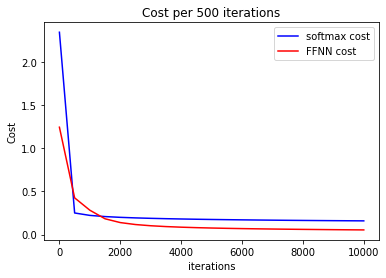

In [ ]:
x = np.arange(0,10001,500)
# print(x)
plt.Figure(figsize=(10,8))
plt.plot(x,cost_soft,color ='blue',label ='softmax cost')
plt.plot(x,cost_ffnn,color ='red',label ='FFNN cost')
plt.legend()
plt.title("Cost per 500 iterations")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()